In [28]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM
import pickle
from sklearn.decomposition import PCA
import sys

In [29]:
df = pd.read_csv("Datas/pca_data.csv")
df

,0,1,2
0,-3.731449,-1.059909,-3.440880
1,-1.875212,-1.707612,-0.649745
2,-4.239635,-5.480496,3.429419
3,-0.159005,1.876003,0.712354
4,-6.609169,3.018527,-3.697604
...,...,...,...
62082,-1.931865,0.961843,-1.988879
62083,-5.465480,2.172931,-2.181264
62084,5.891538,1.290388,-1.696055
62085,10.654075,-3.594597,-0.681663


In [30]:
pkl_filename = "models/pca_model.pkl"
with open(pkl_filename, 'rb') as file:
    pca_model = pickle.load(file)

In [31]:
pd.DataFrame(pca_model.inverse_transform(df.values))

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.025511,0.001192,0.002308,1.991319,0.175567,0.004533,0.083328,0.000128,0.000079,1.435892,...,0.037463,0.589522,0.012939,0.000118,0.000099,0.138968,0.212798,18.548304,0.307275,0.000358
1,0.022304,0.001003,0.001485,1.337769,0.145217,0.003444,0.061110,0.000050,0.000105,1.947316,...,0.031109,0.704956,0.011584,0.000095,0.000114,0.111671,0.141205,20.000067,0.203012,0.000361
2,0.022539,0.001670,0.001406,0.307168,0.103567,0.004900,0.050379,-0.000105,0.000290,2.683863,...,0.029904,0.780692,0.014699,0.000137,0.000249,0.105176,0.059832,17.010714,0.075091,0.000775
3,0.029398,0.000293,0.000459,1.128278,0.159472,0.001884,0.036352,-0.000018,0.000025,2.191747,...,0.035244,0.812421,0.014019,0.000009,0.000034,0.121007,0.103723,22.316330,0.137336,0.000126
4,0.043561,0.000964,0.002271,2.167270,0.227067,0.005390,0.080224,0.000054,0.000042,1.372015,...,0.056016,0.587493,0.022044,0.000063,0.000046,0.204131,0.233655,16.958867,0.312453,0.000300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62082,0.028222,0.000682,0.001451,1.717232,0.175539,0.003168,0.062461,0.000074,0.000030,1.699950,...,0.037514,0.684781,0.013545,0.000060,0.000050,0.134657,0.172375,20.578134,0.243035,0.000198
62083,0.040130,0.000913,0.001868,1.798155,0.205639,0.004806,0.069298,0.000018,0.000064,1.651283,...,0.050942,0.646693,0.020527,0.000058,0.000063,0.183794,0.193949,17.753033,0.256956,0.000320
62084,0.009949,-0.000235,0.000171,1.653302,0.135357,-0.000921,0.039129,0.000169,-0.000109,1.777647,...,0.015189,0.796057,0.001384,0.000010,-0.000040,0.050364,0.128614,27.525644,0.207509,-0.000224
62085,-0.014142,-0.000126,-0.000142,1.280938,0.062912,-0.002683,0.034529,0.000248,-0.000077,1.986107,...,-0.010746,0.839979,-0.011060,0.000064,0.000014,-0.042651,0.081522,30.577886,0.171795,-0.000208


In [33]:
pca_model.explained_variance_ratio_.sum()

0.8440272384981713

In [36]:
X = df.values
model = SOM(m = 1,
            n = 5, 
            dim=X.shape[1],
            max_iter=sys.maxsize,
            initiate_method="SOM++",
            learning_rate=0.5,
            neighbour_rad=2)
model.fit(X, epoch=100)
model.neurons

Training   | [███████████████████████████████████████ ] 99% 

array([[[  1.34201964,  -3.00298737,   2.44267852],
        [ 15.85886377,  -3.42337629,  -2.48545469],
        [  0.7146957 ,  15.86153605,  -2.66070915],
        [-19.84925519,  -5.59673378,   1.30390028],
        [ 18.0129331 ,   2.54613854,  12.57890162]]])

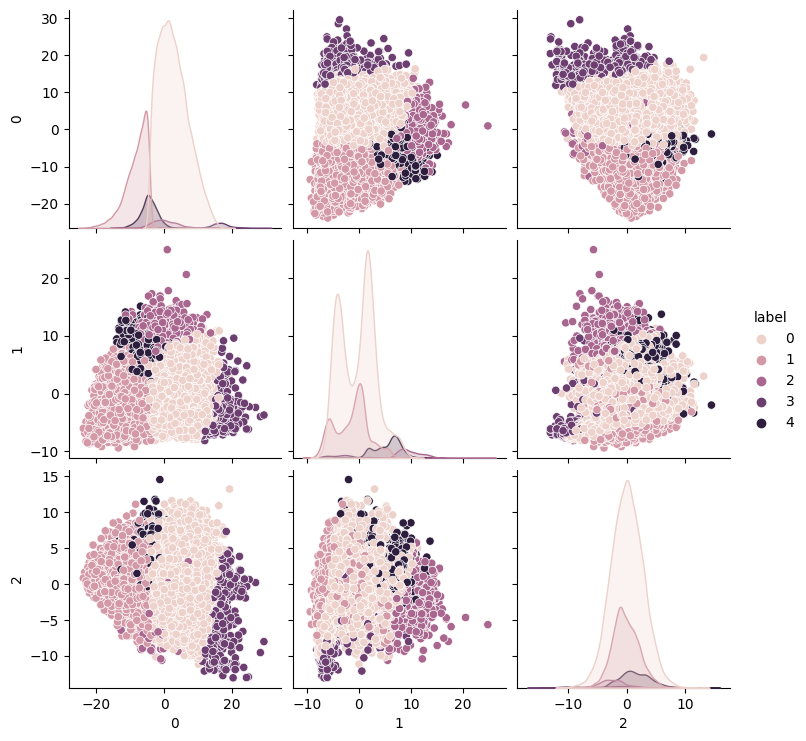

In [35]:
pred = model.predict(X)
plot_df = df.copy(deep=True)
plot_df["label"] = pred
sns.pairplot(plot_df, hue="label", corner=False)

In [38]:
data_cols = pd.read_csv("Datas/cleared_data.csv")
cluster_data = pd.DataFrame(pca_model.inverse_transform( model.cluster_center_), columns=data_cols.columns)
cluster_data[cluster_data > .1].dropna(axis=1)

,"('N', 'H', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('C', 'C', 1)","('O', 'C', 2)","('C', 'H', 1)"
0,2.518878,6.826221,0.645187,9.234845,0.841222,22.495811
1,1.676938,5.327248,0.113477,17.442870,0.842524,35.211105
2,1.557480,5.594957,1.146351,6.486844,0.850683,26.333396
3,2.249403,1.645020,1.234566,1.521032,0.509602,3.289559
4,4.392704,19.066424,0.387297,10.582072,1.467232,38.309146


In [39]:
cluster_data[cluster_data > .1].dropna(axis=1).to_csv("Datas/Stats/clustercenters.csv", index=False)
cluster_data[cluster_data > .1].dropna(axis=1).to_excel("Datas/Stats/clustercenters.xlsx", index=False)

In [42]:
df = pd.read_csv("Datas/cleared_data.csv")
df["label"] = pred
df.to_csv("Datas/labeled_data.csv")